<a href="https://colab.research.google.com/github/vflores-io/Kalman_Filter/blob/master/Machine%20Learning/Python%20Beginner/PyTorch/Getting%20Started%20Guide/02_datasets_and_dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets and DataLoaders

Ideally, we want out dataset code to be decoupled from our model training code for better readability and modularity.

PyTorch offers two data primitives, which allow using pre-loaded datasets as well as own data:

1. `torch.utils.data.Dataset`: Stores the samples and their corresponding labels
2. `torch.utils.data.DataLoader`: Wraps an iterable around the `dataset` to enable easy acceess to the samples.

PyTorch domain libraries privde a number of pre-loaded datasets that subclass `torch.utils.data.Dataset` and implement functions specific to the particular data. They can be used to prototype and benchmarking. They can be found here:
- [Image Datasets](https://pytorch.org/vision/stable/datasets.html)
- [Test Datasets](https://pytorch.org/text/stable/datasets.html)
- [Audio Datasets](https://pytorch.org/audio/stable/datasets.html)



## Loading a Dataset

Here is an example of how to load the [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28x28 grayscale image and an associated label from one of 10 classes.

First, we load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:
- `root` is the path where the train/test data is stored
- `train` specifies training or test dataset
`download = True` downloads the data from the internet if it's not available at `root`
- `transform` and `target_transform` specify the feature and label transformations

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

train_data

100%|██████████| 26421880/26421880 [00:02<00:00, 10667550.67it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 180955.19it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3614962.76it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14779108.14it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

<function matplotlib.pyplot.show(close=None, block=None)>

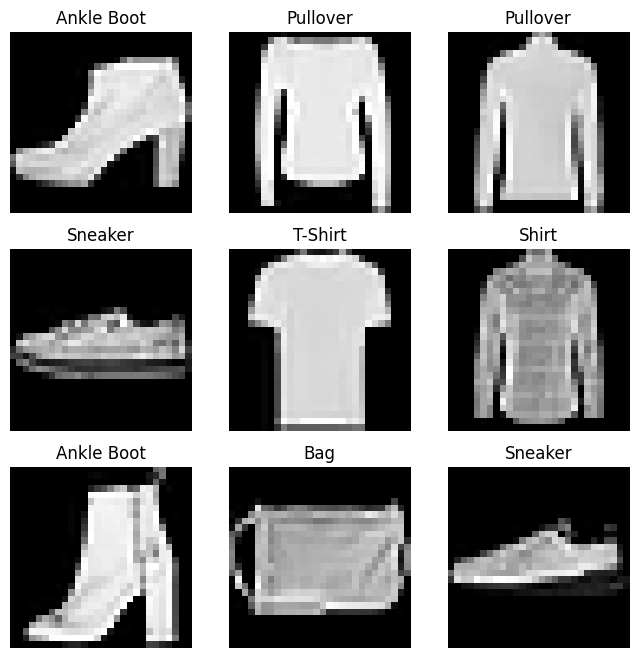

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize = (8,8))

cols, rows = 3, 3

for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size = (1,)).item()
  img, label = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap = 'gray')

plt.show




## Creating a Custom Dataset for your Files

A custom Dataset class must implement three functions: `__init_`, `__len__`, and `__getitem__`. In this next implementation, the FashionMNIST images are stored ina  directory `img_dir`, and their labels are stored separately in a CSV file `annotations_file`.

In [3]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
    self.image_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

